# Build a simple model with Python

In this notebook we will create a simple decision tree model to classify countries into low and high happiness based on life expectancy and unemployment.  We will use a really tiny data set with just 12 rows.  This is unrealistic for any real machine learning, but it will help our learning.

In [31]:
import os
# Verifica se o arquivo já existe localmente
if not os.path.exists("functions.py"):
    # Se não existir, faz o download do arquivo usando wget
    !wget https://raw.githubusercontent.com/flavioluizseixas/IA-Medicina/main/Supervised-Learning/functions.py

if not os.path.exists("world_data.csv"):
    !wget https://raw.githubusercontent.com/flavioluizseixas/IA-Medicina/main/Supervised-Learning/world_data.csv

In [32]:
# Import Python libraries for data manipuation and visualization
import pandas as pd
import numpy as np
import matplotlib.pyplot as pyplot

# Import the Python machine learning libraries we need
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# Import some convenience functions.  This can be found on the course github
from functions import *

## Define the Task

"Use life expectancy and long-term unemployment rate to predict the perceived happiness (low or high) of inhabitants of a country."

## Acquire Clean Data

In [33]:
# Load the data set
dataset = pd.read_csv("world_data.csv")

## Understand the data

### Inspect the Data

In [34]:
# Inspect first few rows
dataset.head(12)

,country,happiness,income,lifeexp,sanitation,water,urbanpopulation,unemployment,literacy,inequality,murder,energy,childmortality,fertility,hiv,foodsupply,population
0,Afghanistan,3.982855,1750.0,57.9,39.2,63.0,11.0,NaN,39.0,NaN,NaN,NaN,73.2,4.80,5800.0,2090.0,33700000
1,Albania,4.606651,11000.0,77.6,97.7,91.4,NaN,6.090,96.8,29.0,2.300,808.0,14.0,1.71,NaN,3190.0,2920000
2,Argentina,6.697131,19100.0,76.5,94.8,99.6,43.1,0.856,97.9,41.4,4.650,2020.0,11.6,2.31,95000.0,3230.0,43400000
3,Armenia,4.348320,8180.0,75.4,91.6,98.9,36.7,7.110,99.6,32.4,1.120,1020.0,14.0,1.66,3600.0,2930.0,2920000
4,Australia,7.309061,43800.0,82.6,100.0,100.0,60.2,1.240,NaN,34.7,1.110,5480.0,3.8,1.86,22000.0,3280.0,23800000
5,Austria,7.076447,44100.0,81.4,100.0,100.0,21.2,1.430,NaN,30.5,0.508,3800.0,3.6,1.49,18000.0,3770.0,8680000
6,Azerbaijan,5.146775,16700.0,71.8,89.3,84.4,22.9,2.210,99.8,16.6,0.231,1500.0,32.0,2.09,6700.0,3120.0,9620000
7,Bahrain,6.007375,44500.0,76.8,100.0,100.0,NaN,NaN,94.6,NaN,0.521,10600.0,7.7,2.05,NaN,NaN,1370000
8,Bangladesh,4.633474,3130.0,72.4,46.9,97.3,13.7,0.969,57.7,32.1,NaN,222.0,36.3,2.13,7700.0,2450.0,161000000
9,Belarus,5.718908,17200.0,73.3,94.3,98.0,20.5,NaN,99.6,26.7,10.100,2930.0,4.0,1.69,20000.0,3250.0,9490000


In [35]:
# Inspect data shape
dataset.shape

(194, 17)

In [40]:
# Inspect descriptive stats
dataset.describe()

,happiness,income,lifeexp,sanitation,water,urbanpopulation,unemployment,literacy,inequality,murder,energy,childmortality,fertility,hiv,foodsupply,population
count,140.000000,193.000000,187.000000,194.000000,194.000000,119.000000,112.00000,149.000000,160.000000,93.000000,169.000000,193.000000,184.000000,1.490000e+02,168.000000,1.940000e+02
mean,5.395765,17432.849741,71.933690,73.838247,86.329381,24.322185,1.90881,81.573826,38.579375,4.953132,2183.725325,31.441451,2.835924,2.179917e+05,2845.952381,3.787195e+07
std,1.123605,19122.183694,7.605557,29.269367,17.568245,15.569400,2.04772,19.476814,7.995857,10.261882,2806.613656,31.319236,1.372184,6.304909e+05,444.201818,1.419670e+08
min,2.701591,623.000000,49.600000,7.080000,19.300000,3.880000,0.01820,25.300000,16.600000,0.057800,9.580000,2.200000,1.240000,6.000000e+01,1880.000000,1.100000e+04
25%,4.610368,3290.000000,66.050000,49.225000,77.900000,13.450000,0.58675,70.300000,32.775000,0.660000,563.000000,8.200000,1.777500,7.600000e+03,2505.000000,1.982500e+06
50%,5.331034,11000.000000,73.300000,87.900000,94.950000,20.500000,1.25000,90.000000,37.450000,1.400000,1250.000000,17.700000,2.335000,2.400000e+04,2825.000000,8.435000e+06
75%,6.257746,24100.000000,77.500000,97.700000,99.300000,29.000000,2.16500,97.400000,43.125000,4.820000,2710.000000,49.500000,3.842500,1.300000e+05,3200.000000,2.742500e+07
max,7.603434,120000.000000,83.800000,100.000000,100.000000,100.000000,10.70000,100.000000,63.000000,77.600000,18600.000000,137.000000,7.290000,5.600000e+06,3770.000000,1.400000e+09


### Visualise

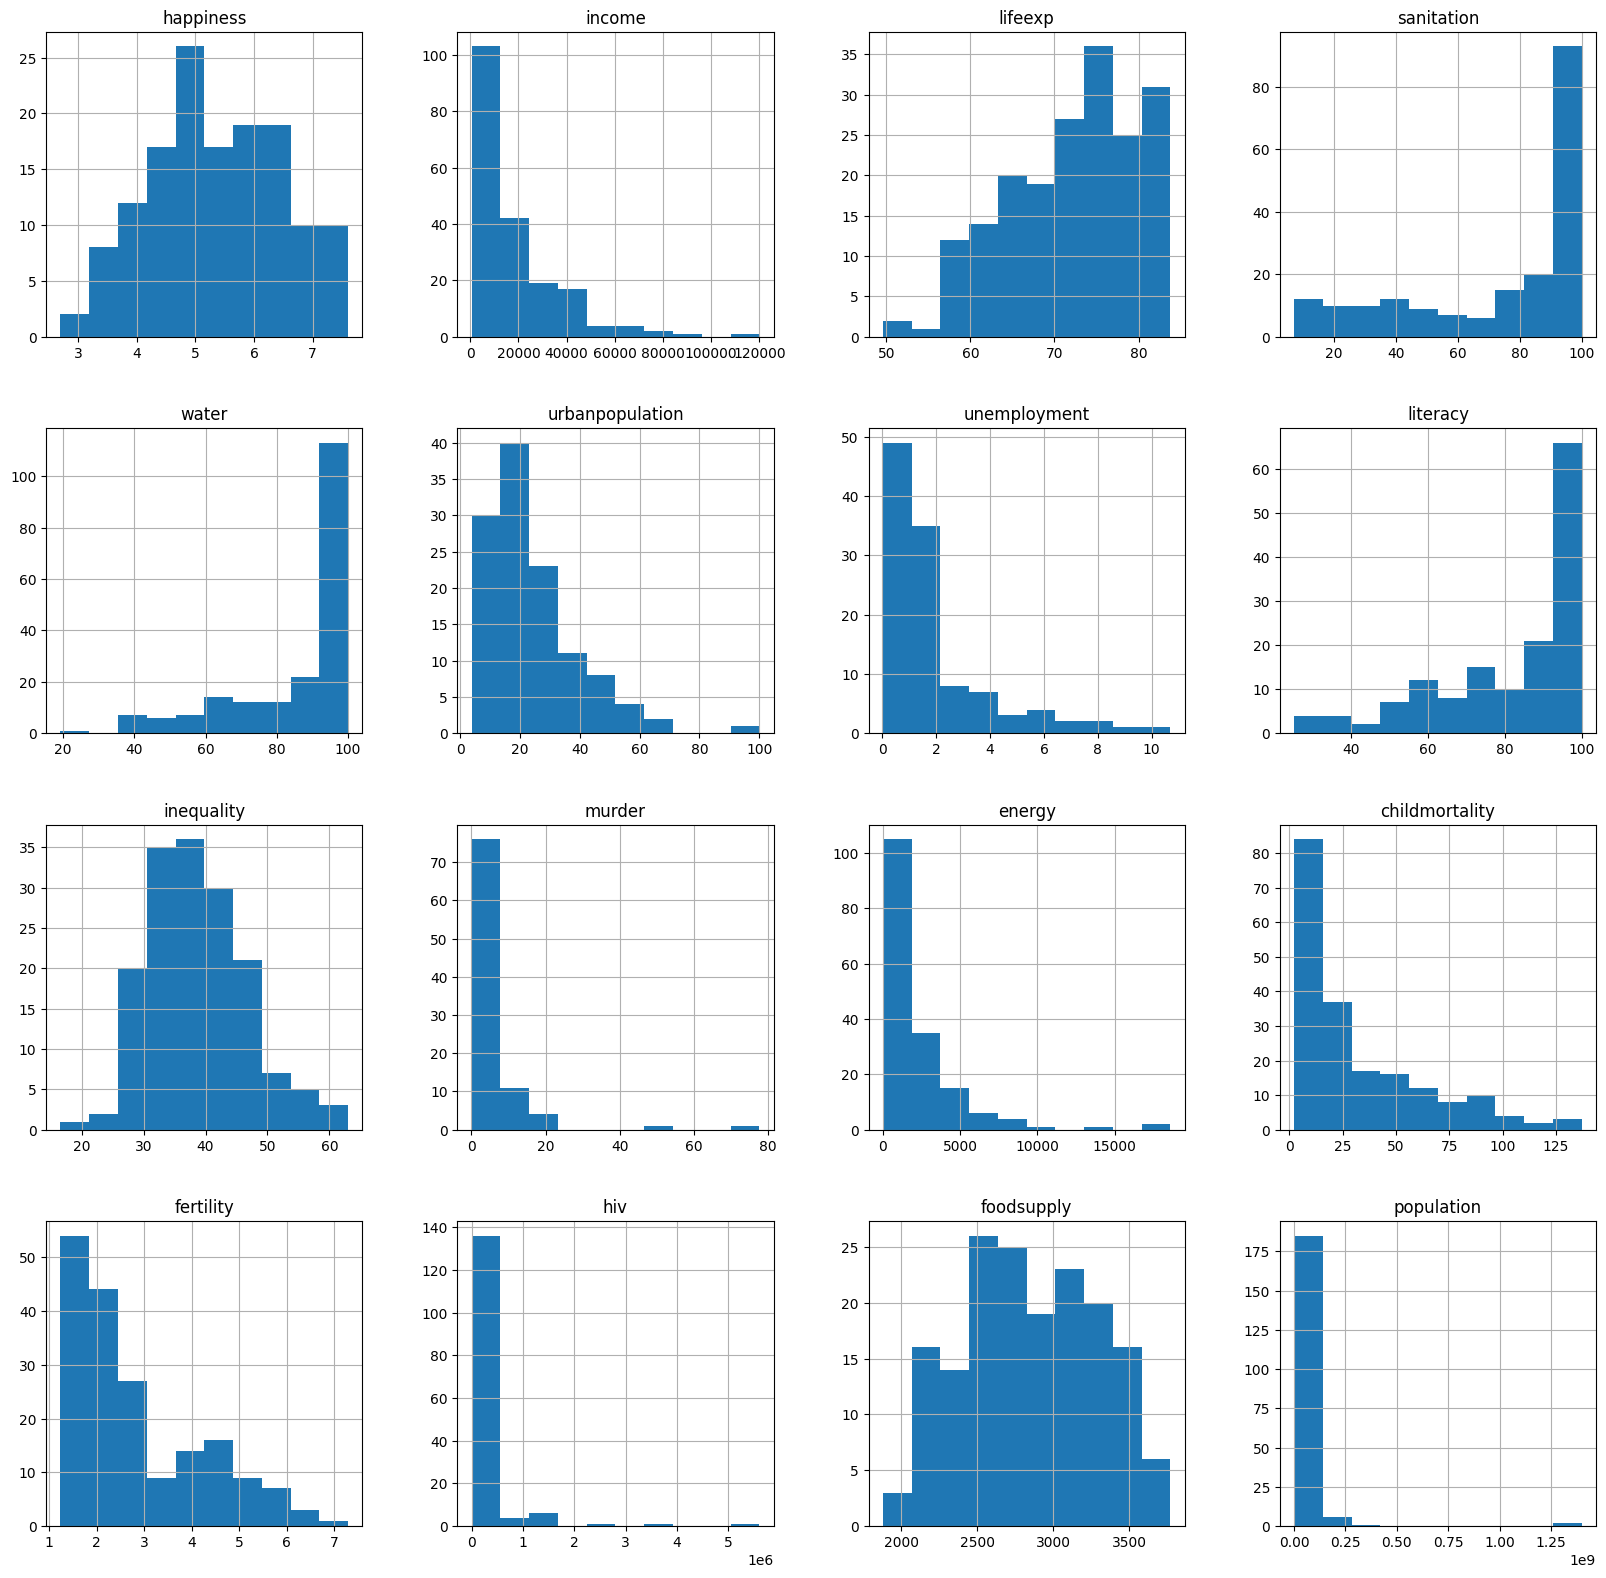

In [37]:
# View univariate histgram plots
histPlotAll(dataset)

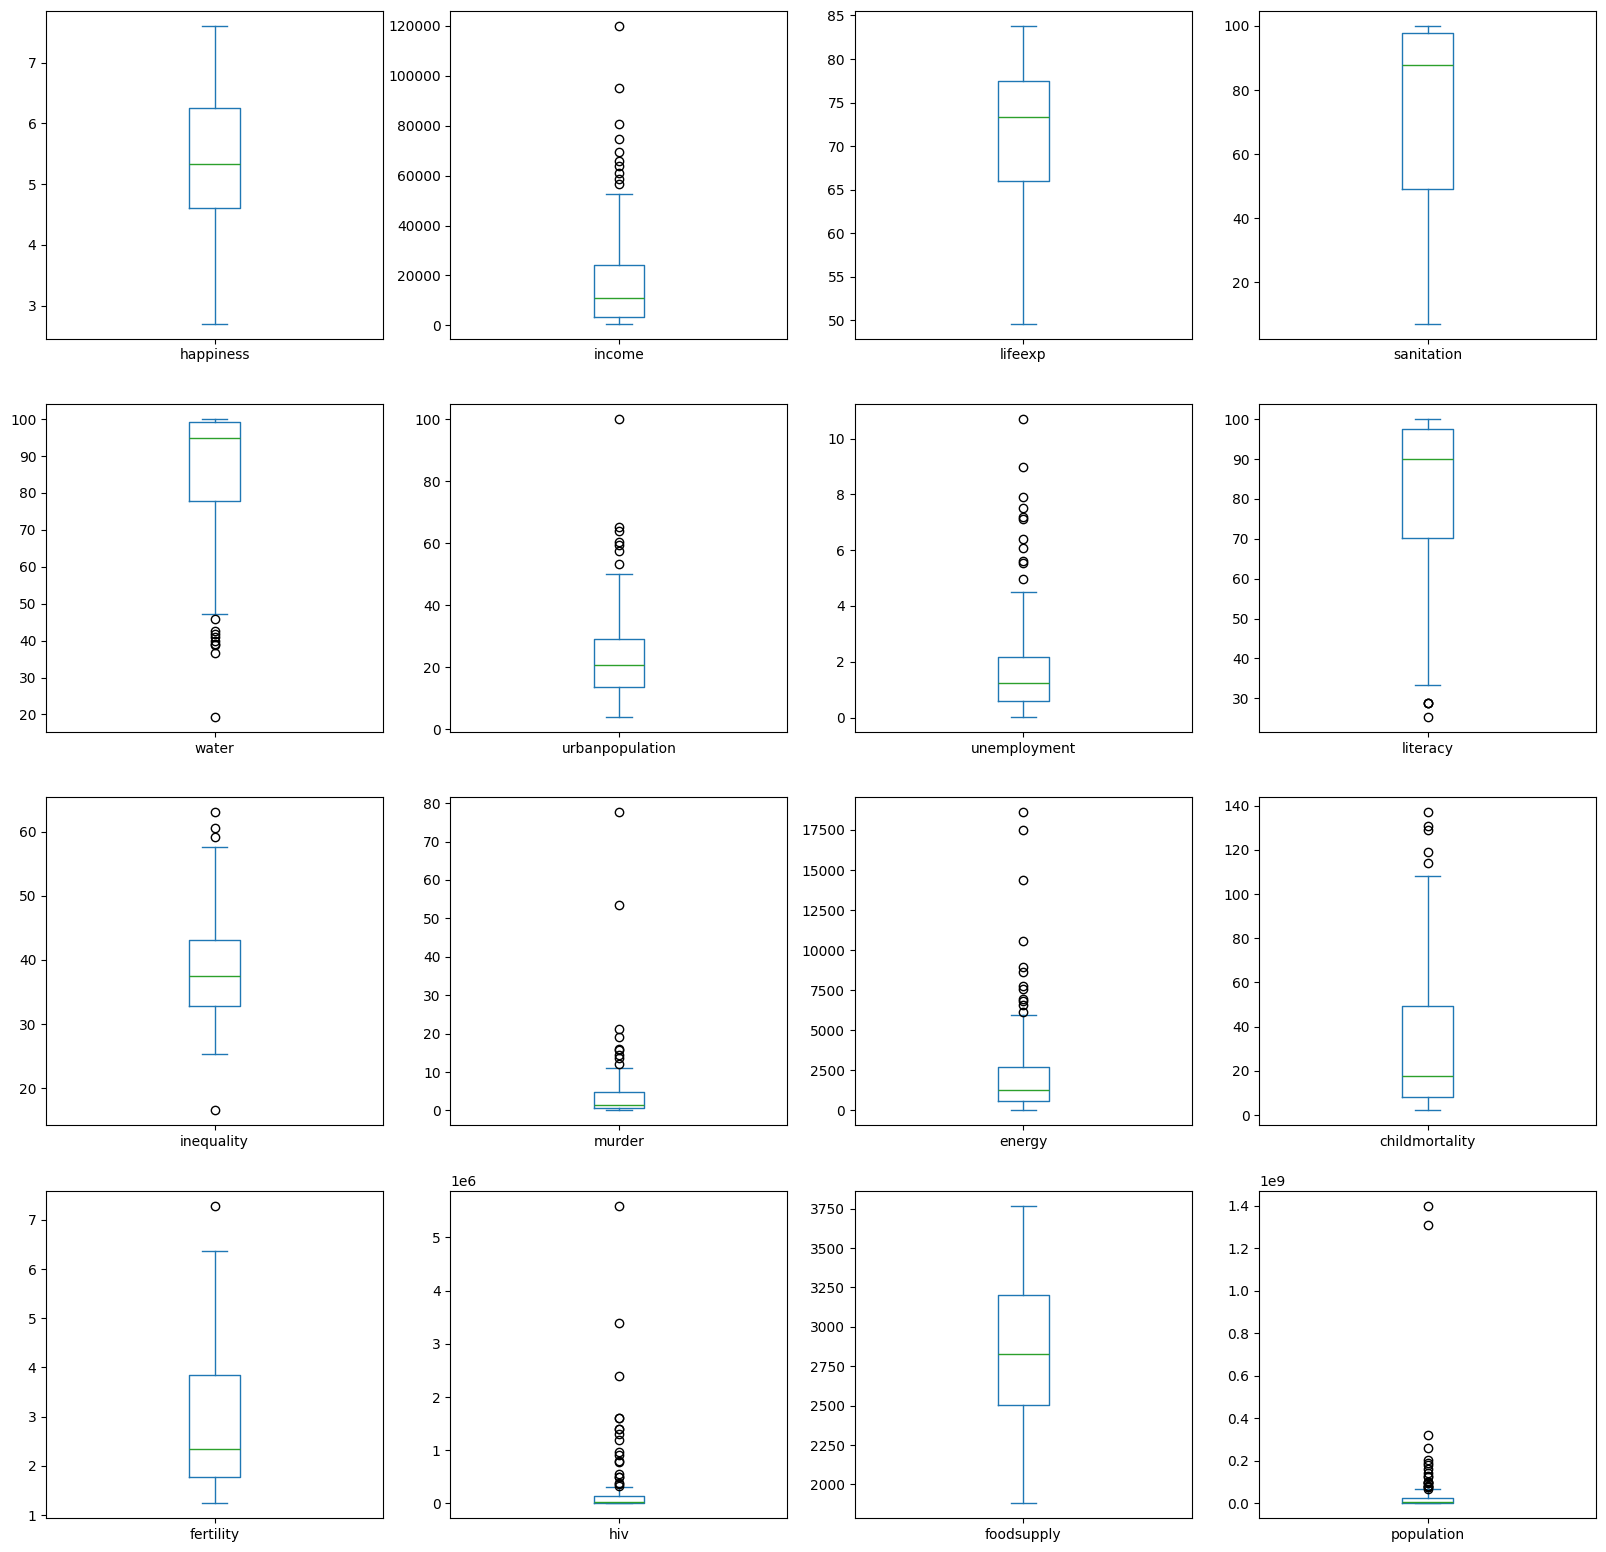

In [38]:
# View univariate box plots
boxPlotAll(dataset)

Comparative histograms for [3.9828546  4.60665083 6.69713068 4.34831953 7.30906057 7.07644701
 5.14677477 6.00737524 4.63347387 5.71890783 6.90421915 3.62466431
 5.08212852 5.83432913 5.11717796 3.7619648  6.54689693 4.86540127
 4.41893005 4.16216469 5.03796482 7.41277266 4.32267523 6.53274965
 5.30387783 6.38757181 4.69083023 3.90274167 6.85400438 5.20543814
 5.4391613  6.60801744 7.5144248  5.06186247 5.96407509 4.76253843
 6.01849604 5.62890863 4.57315493 7.44792557 6.35762501 4.66101265
 4.12194061 7.03713751 3.98591614 5.62251902 6.4649868  3.50469351
 3.56976247 4.84543657 5.34438324 7.49807072 4.34207916 5.04279995
 4.74995565 4.49337721 6.83012533 7.07941103 5.84768391 4.4450388
 5.87968445 5.40459347 5.94999504 4.35761786 6.14603186 4.90537596
 5.88059759 5.17197132 2.70159125 5.61540461 5.7113781  6.70157146
 4.97558975 3.59251404 3.86763835 6.32212114 4.58209848 6.61339426
 3.92266417 6.23628712 6.01747227 4.9827199  5.12492132 5.16315699
 4.54976749 4.22384644 4.81243658 7.

IndexError: tuple index out of range

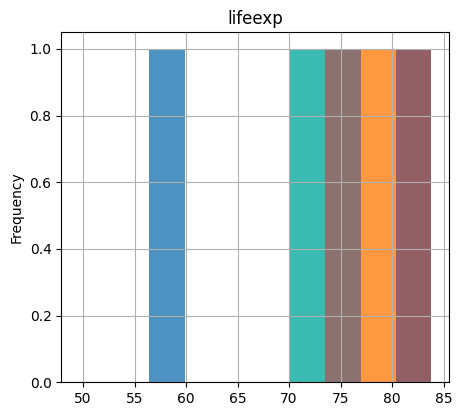

In [39]:
# View class split
classComparePlot(dataset[["happiness","lifeexp","unemployment"]], 'happiness', plotType='hist')

## Prepare the data for machine learning

### Select Features and Split into input and target features

In [ ]:
# Split into input and output features
y = dataset["happiness"]
X = dataset[["lifeexp","unemployment"]]

In [ ]:
X.head()

,lifeexp,unemployment
0,77.6,6.09
1,75.0,3.24
2,75.8,2.11
3,71.9,1.53
4,61.8,7.52


In [ ]:
y.head()

0    Low
1    Low
2    Low
3    Low
4    Low
Name: happiness, dtype: object

## Build a model

### Split into test and training sets

In [ ]:
# Split into test and training sets
test_size = 0.33
seed = 7
X_train, X_test, y_train, y_test =  train_test_split(X, y, test_size=test_size, random_state=seed)

In [ ]:
X_train

,lifeexp,unemployment
0,77.6,6.09
1,75.0,3.24
11,77.5,0.06
8,80.7,1.36
3,71.9,1.53
6,81.4,1.43
9,75.7,4.96
4,61.8,7.52


In [ ]:
X_test

,lifeexp,unemployment
7,77.3,5.53
10,71.4,1.26
2,75.8,2.11
5,71.9,1.53


In [ ]:
y_train

0      Low
1      Low
11    High
8     High
3      Low
6     High
9     High
4      Low
Name: happiness, dtype: object

In [ ]:
y_test

7     High
10    High
2      Low
5      Low
Name: happiness, dtype: object

### Select an algorithm

In [ ]:
# Select algorithm
model = DecisionTreeClassifier()

### Fit the model to the data

In [ ]:
# Fit model to the data
model.fit(X_train, y_train)

DecisionTreeClassifier()

### Check the model

In [ ]:
# Check model performance on training data
predictions = model.predict(X_train)
print(accuracy_score(y_train, predictions))

1.0


## Evaluate the model

### Compute accuracy score

In [ ]:
# Evaluate the model on the test data
predictions = model.predict(X_test)

In [ ]:
# Look at the predictions
predictions

array(['Low', 'High', 'High', 'Low'], dtype=object)

In [ ]:
# Compute the accuracy score
print(accuracy_score(y_test, predictions))

0.5


In [ ]:
# Show the model predictions against the orginal data
df = X_test.copy()
df['Actual'] = y_test
df['Prediction'] = predictions
df

,lifeexp,unemployment,Actual,Prediction
7,77.3,5.53,High,Low
10,71.4,1.26,High,High
2,75.8,2.11,Low,High
5,71.9,1.53,Low,Low


## Examine the rules created by Sklearn

You may need to run the following install to see the decision tree visualisation:

<pre>conda install python-graphviz</pre>

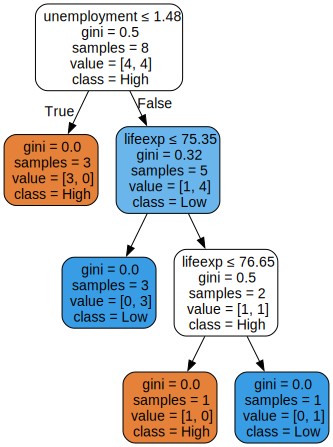

In [ ]:
viewDecisionTree(model, X.columns)